# Diet and Cost Minimization Calculator
>    This calculator will minimize the cost given a set of food [variables] and constraints on those variables.  

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import pulp
from IPython.display import display, HTML

## Table of Available Foods:

In [2]:
groceries = pd.read_csv('groceries.csv')
display(groceries,)

,Items,Carbohydrates,Protein,Fat,Calories,Fiber,Serving,Cost,Cat,Description
0,Apple,15,0,0.0,63,5,1 apple,0.220,Integer,Great Value Apple
1,Beer,7,1,0.0,110,0,12oz,0.733,Integer,Budlight 30 Pack
2,Bread,14,3,1.0,70,2,1 slice,0.060,Integer,Great Value Wheat Bread
3,Broccoli,4,1,0.0,25,2,3oz=1cup,0.270,Integer,Great Value Frozen Broccoli
4,Brown_Rice,140,16,6.0,640,8,180g=1cup,0.270,Continuous,Great Value Brown Rice
5,Cheese,1,7,9.0,111,0,1oz,0.270,Integer,Great Value Mild Shredded Cheddar
6,Chicken,0,19,8.0,150,0,4oz,0.770,Integer,Costco Chicken Thighs
7,Coconut_Oil,0,0,14.0,120,0,1tbsp,0.100,Integer,Costco Coconut Oil
8,Coke,0,0,0.0,0,0,12oz,0.310,Integer,Coke Zero
9,Corn,11,2,1.0,60,3,4oz=1/2cup,0.360,Integer,Great Value Corn


                    https://www.tablesgenerator.com/html_tables#
            https://pythonhosted.org/PuLP/CaseStudies/a_blending_problem.html

>   We are going to use the above table, nutrition values, cost and Python to minimize cost given our constraints

In [3]:

items=groceries['Items'].values
carbs=groceries.set_index('Items').drop(['Protein','Fat','Calories','Serving','Fiber','Cost','Cat','Description'],axis=1).to_dict()
protein=groceries.set_index('Items').drop(['Carbohydrates','Fat','Calories','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
fat=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
cal=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Fiber','Serving','Cost','Cat','Description'],axis=1).to_dict()
fiber=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Serving','Calories','Cost','Cat','Description'],axis=1).to_dict()
serv=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fat','Fiber','Calories','Cost','Cat','Description'],axis=1).to_dict()
cost=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Fat','Cat','Description'],axis=1).to_dict()
category=groceries.set_index('Items').drop(['Carbohydrates','Protein','Calories','Fiber','Serving','Fat','Description','Cost'],axis=1).to_dict()
description=groceries.set_index('Items').drop(['Carbohydrates','Protein','Fiber','Calories','Serving','Fat','Cat','Cost'],axis=1).to_dict()

# Create the 'diet' variable to contain the problem data
diet = pulp.LpProblem("Minimize Cost", pulp.LpMinimize)

# A dictionary called 'item_vars' is created to contain the referenced Variables
item_vars= pulp.LpVariable.dict('Items',items,lowBound=0,cat='Integer')
for i in category['Cat']:
    item_vars[i].cat=category['Cat'][i]

# The objective function is added to 'diet' first
diet += pulp.lpSum([cost['Cost'][i]*item_vars[i] for i in items]), "Cost"


## Primary Variables

### Omar

In [4]:

Calories=2000
eps=Calories*.0
Goal_Weight=170

diet += item_vars['Beer'] >= 2
#diet += item_vars['Bread'] <= 4 
#diet += item_vars['Bread'] >= 4 
#diet += item_vars['Broccoli'] <= 0 
#diet += item_vars['Brown_Rice'] >= 0.5
#diet += item_vars['Brown_Rice'] <= 0.5
#diet += item_vars['Cheese'] >= 1 
#diet += item_vars['Chicken'] <= 0
#diet += item_vars['Coconut_Oil'] <= 0
#diet += item_vars['Corn'] <= 0
#diet += item_vars['Eggs'] <= 8
#diet += item_vars['Eggs'] >= 6
#diet += item_vars['Elbow_Pasta'] <= 0
#diet += item_vars['Greek_Yogurt'] <= 0
#diet += item_vars['Green_Beans'] <= 0
#diet += item_vars['Ground_Beef'] <= 0
#diet += item_vars['Half_and_Half'] <= 0
diet += item_vars['Italian_Power_Bowl'] >= 1
#diet += item_vars['Mayonnaise'] <= 0
#diet += item_vars['Oats'] <= 0 
#diet += item_vars['Orange'] <= 0
#diet += item_vars['Pasta_Sauce'] <= 0
#diet += item_vars['Peanut_Butter'] <= 0
#diet += item_vars['Refried_Beans'] <= 0
#diet += item_vars['Rice_Cakes'] >= 2
#diet += item_vars['Rolls'] <= 0
#diet += item_vars['Sausage'] >= 1 
#diet += item_vars['Sausage'] <= 0
#diet += item_vars['Tuna'] <= 0
#diet += item_vars['Turkey_Bacon'] >= 4
#diet += item_vars['Whey'] <= 4

### Dee

## Constraints

In [5]:
# The seven constraints are added to 'diet'
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) <= Goal_Weight, "lowProteinRequirement"
diet += pulp.lpSum([protein['Protein'][i] * item_vars[i] for i in items]) >= Goal_Weight, "highProteinRequirement"
diet += 4*pulp.lpSum([carbs['Carbohydrates'][i] * item_vars[i] for i in items]) <= Calories/3, "CarbohydrateRequirement"
diet += 9*pulp.lpSum([fat['Fat'][i] * item_vars[i] for i in items]) <= Calories, "FatRequirement"
diet += pulp.lpSum([fiber['Fiber'][i] * item_vars[i] for i in items]) >= Calories*30/2000, "FiberRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) <= Calories+eps, "lowCalorieRequirement"
diet += pulp.lpSum([cal['Calories'][i] * item_vars[i] for i in items]) >= Calories-eps, "HighCalorieRequirement"

In [6]:
diet.solve()
print(pulp.LpStatus[diet.status])

Optimal


# Results

In [7]:
np.set_printoptions(precision=2)
print("\tDaily Meal Cost $" + str(round(pulp.value(diet.objective),2)))



	Daily Meal Cost $9.33


In [8]:
csum=psum=fsum=fisum=ccsum=cccsum=0
for var in diet.variables():
    csum += var.varValue * carbs['Carbohydrates'][str(var)[6:]]
    psum += var.varValue * protein['Protein'][str(var)[6:]]
    fsum += var.varValue * fat['Fat'][str(var)[6:]]
    fisum += var.varValue * fiber['Fiber'][str(var)[6:]]
    ccsum += var.varValue * cal['Calories'][str(var)[6:]]
    cccsum += var.varValue * cost['Cost'][str(var)[6:]]

print("\t" + str(round(csum)) + " grams of carbs for " + str(round(4*csum)) + " calories")
print("\t" + str(round(psum)) + " grams of protein for " + str(round(4*psum)) + " calories")
print("\t" + str(round(fsum)) + " grams of fat for " + str(round(9*fsum)) + " calories")
print("\t" + str(round(fisum)) + " grams of fiber")
print("\t" + str(round(ccsum)) + " total calories")

	164 grams of carbs for 658 calories
	170 grams of protein for 680 calories
	58 grams of fat for 523 calories
	30 grams of fiber
	2000 total calories


In [9]:

namesData=[]
carbsData=[]
proteinData=[]
fatData=[]
fiberData=[]
calData=[]
costData=[]

for var in diet.variables():
    if var.varValue > 0:
        print("\t" + str(round(var.varValue,2)) + " x " + serv['Serving'][str(var)[6:]] + " of " + var.name[6:])
        namesData.append(str(var)[6:])
        carbsData.append(round(var.varValue*carbs['Carbohydrates'][str(var)[6:]],2))
        proteinData.append(round(var.varValue*protein['Protein'][str(var)[6:]],2))
        fatData.append(round(var.varValue*fat['Fat'][str(var)[6:]],2))
        fiberData.append(round(var.varValue*fiber['Fiber'][str(var)[6:]],2))
        calData.append(round(var.varValue*cal['Calories'][str(var)[6:]],2))
        costData.append(round(var.varValue*cost['Cost'][str(var)[6:]],2))


	2.0 x 12oz of Beer
	4.0 x 1 slice of Bread
	7.0 x 1 egg of Eggs
	0.22 x 1/2cup dry of Elbow_Pasta
	0.1 x 2/3cup=170g of Greek_Yogurt
	1.0 x 1 bowl of Italian_Power_Bowl
	0.14 x 1/2cup=40g of Oats
	2.0 x 4oz=1/2cup of Refried_Beans
	1.0 x 2oz=1/4cup of Tuna
	3.0 x 1 scoop of Whey


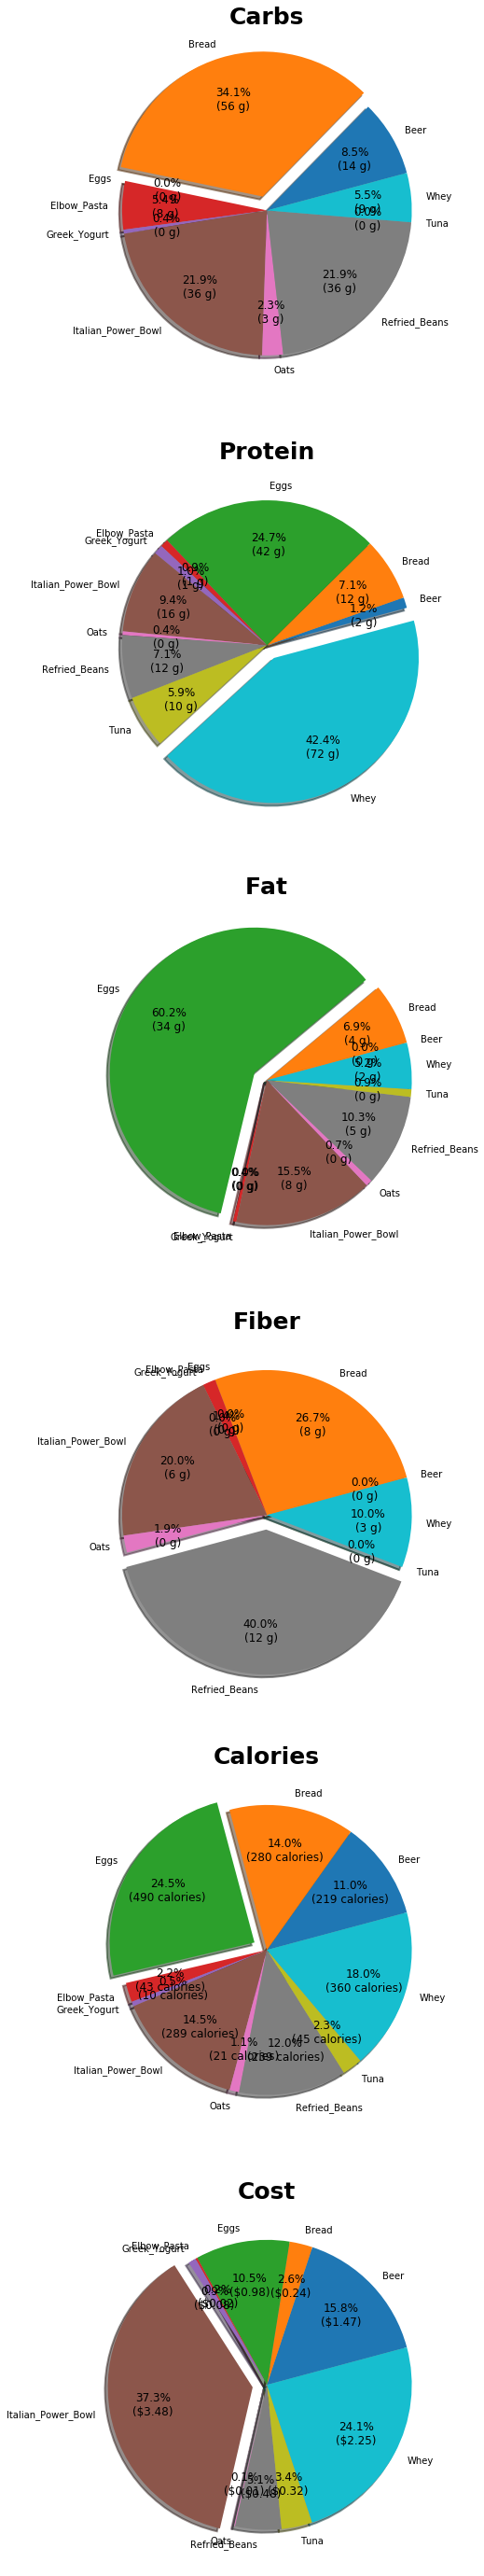

In [10]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

def func1(pct, allvals):
    absolute = pct/100.*np.sum(allvals)
    return "{:.1f}%\n(${:.2f})".format(pct, absolute)

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} calories)".format(pct, absolute)

def doColors(autotexts):
    for autotexts in autotexts:
        autotexts.set_color('black')
        #autotexts.size=15
        #autotexts.weight='bold'


explodeVal=0.1
autoWeightVal='normal'
labelVal='black'
autoTxtVal=12
titleVal=25
titleWeightVal='bold'
titleColor='black'
startAngleVal=15
        
print('\n\n')
pp.subplot(6,1,1)
pp.rcParams['text.color'] = labelVal
pp.title("Carbs",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(carbsData).index(np.max(carbsData))] = explodeVal
_,_,autotexts=pp.pie(carbsData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, carbsData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,2) 
pp.rcParams['text.color'] = labelVal
pp.title("Protein",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(proteinData).index(np.max(proteinData))] = explodeVal
_,_,autotexts=pp.pie(proteinData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, proteinData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)
 
pp.subplot(6,1,3) 
pp.rcParams['text.color'] = labelVal 
pp.title("Fat",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(fatData).index(np.max(fatData))] = explodeVal
_,_,autotexts=pp.pie(fatData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, fatData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,4) 
pp.rcParams['text.color'] = labelVal 
pp.title("Fiber",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(fiberData).index(np.max(fiberData))] = explodeVal
_,_,autotexts=pp.pie(fiberData,explode=explode,labels=namesData, autopct=lambda pct: func(pct, fiberData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,5) 
pp.rcParams['text.color'] = labelVal
pp.title("Calories",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(calData).index(np.max(calData))] = explodeVal
_,_,autotexts=pp.pie(calData,explode=explode,labels=namesData, autopct=lambda pct: func2(pct, calData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

pp.subplot(6,1,6)
pp.rcParams['text.color'] = labelVal
pp.title("Cost",fontsize=titleVal,weight=titleWeightVal,color=titleColor);
explode = np.zeros(len(namesData))
explode[list(costData).index(np.max(costData))] = explodeVal
_,_,autotexts=pp.pie(costData,explode=explode,labels=namesData, autopct=lambda pct: func1(pct, costData),shadow=True, \
    startangle=startAngleVal,pctdistance=.7,wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
doColors(autotexts)
pp.setp(autotexts,size=autoTxtVal,weight=autoWeightVal)

fig=pp.gcf()
fig.set_size_inches(50,50)

pp.show()